## Face & Eye Detection using HAAR Cascade Classifiers

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


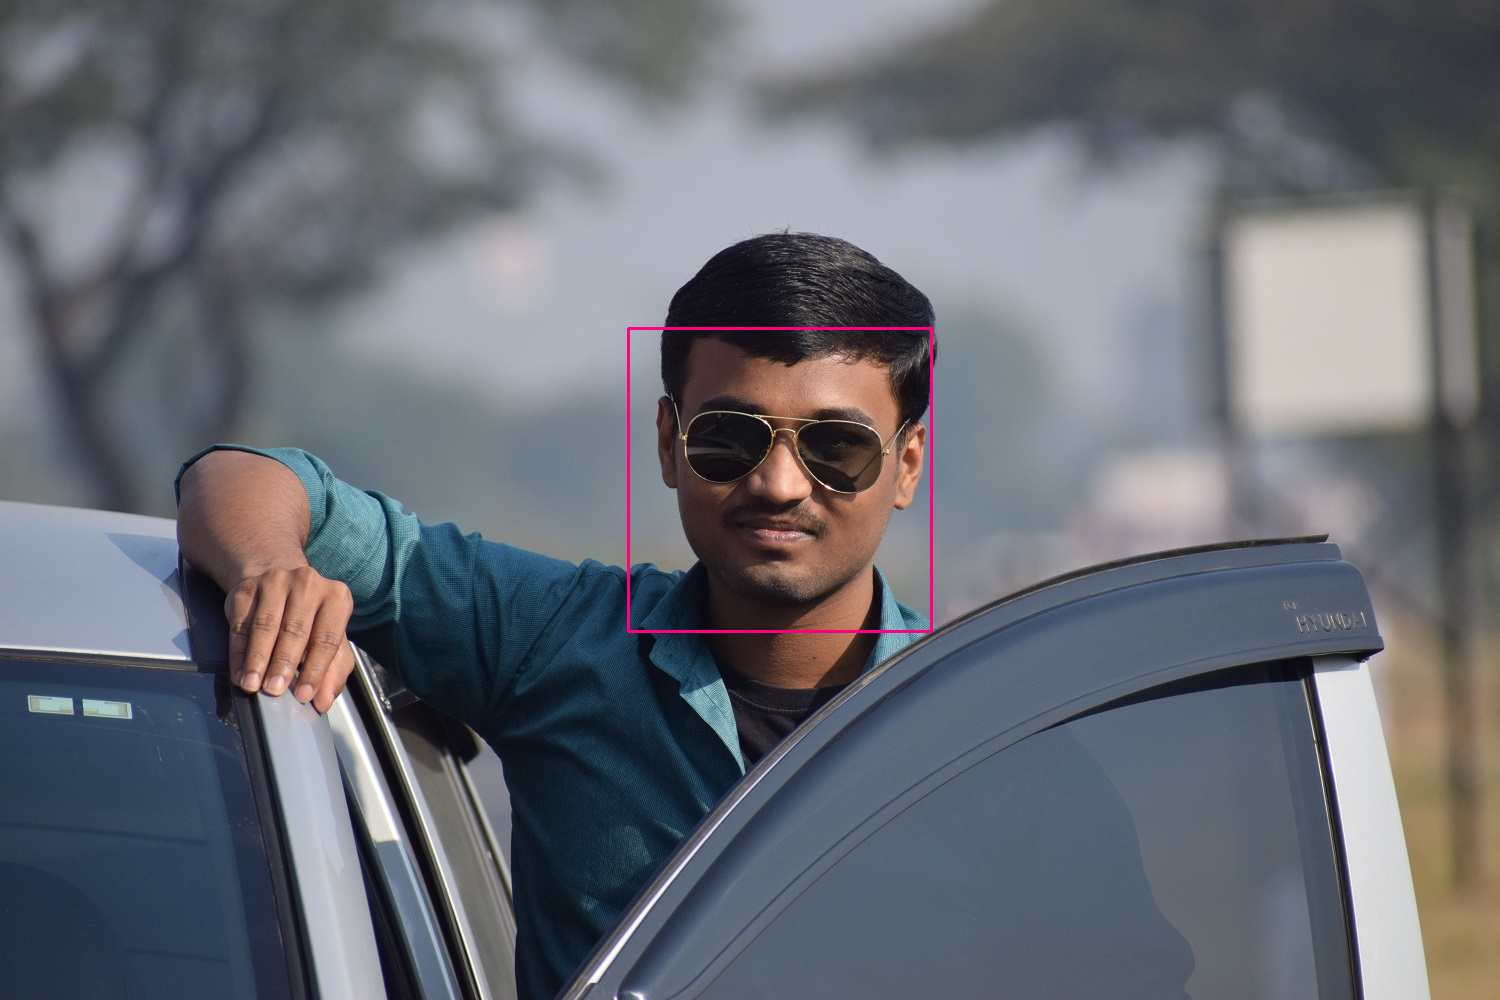

True

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# We point OpenCV's CascadeClassifier function to where our classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/Haarcascades/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/image_examples/input1_Ashish.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/Ashish_face_output.jpg', image)

### Let's combine face and eye detection

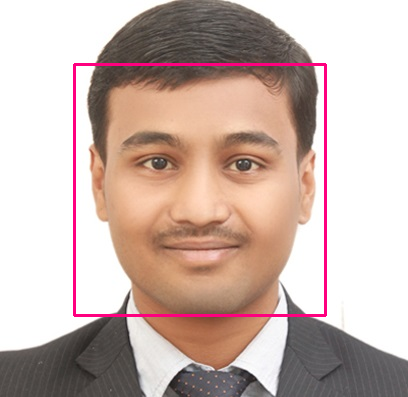

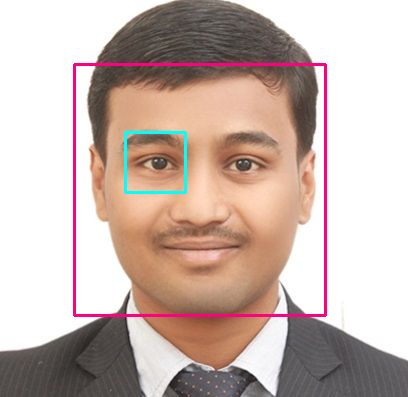

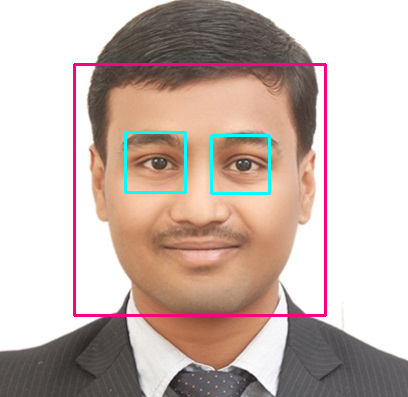

True

In [3]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/image_examples/input_Ashish.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2_imshow(img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2_imshow(img)
        cv2.waitKey(0)
    
cv2.destroyAllWindows()
cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision OpenCV/Ashish_face_and_eye_output.jpg', img)


### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  
